# Description:
The goal of this project is to build a recommendation engine using some attributes of the dataset such as languages, authors, etc.
To begin with, the dataset columns are cleaned. In addition, the exploratory data analysis is performed to get some insights from the dataset. Furthermore, several recommendations for books are proposed based on different features of the dataset. A final recomendation engine is built by using the K-Nearest Neighbor algorithm. 

In [1]:
# Importing the necessary libraries
import numpy as np 
import pandas as pd
import re
## For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## For jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

## For interactive shells
from IPython.display import display

## Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("books.csv", error_bad_lines=False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
df.shape

(11123, 12)

In [4]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [5]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [8]:
## Let's remove the leading and trailing spaces in the columns name
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [19]:
# Information about the data we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [20]:
## Looking for misssing values
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [22]:
# Description of the numerical caolumns
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [23]:
# Description of the categorical columns
df.describe(include="object")

,title,authors,isbn,language_code,publication_date,publisher
count,11123,11123,11123,11123,11123,11123
unique,10348,6639,11123,24,3679,2290
top,The Iliad,Stephen King,0439785960,eng,10/1/2005,Vintage
freq,9,40,1,10537,56,318


In [24]:
# Checking if there were some duplicated values
df.duplicated().any()

False

# Data analysis & Features Engineering

Let's remove the unnecessary columns

In [25]:
df["isbn13"].nunique()

11123

In [26]:
df["isbn"].nunique()

11123

In [27]:
df = df.drop(["isbn", "isbn13", "bookID"], axis=1)

In [28]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher'],
      dtype='object')

### Cleaning the column language_code

In [10]:
df["language_code"].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [11]:
df["language_code"] = df["language_code"].replace(['en-US', 'en-GB', 'en-CA'], ["eng", "eng", "eng"])

In [12]:
df["language_code"].unique()

array(['eng', 'fre', 'spa', 'mul', 'grc', 'enm', 'ger', 'jpn', 'ara',
       'nl', 'zho', 'lat', 'por', 'srp', 'ita', 'rus', 'msa', 'glg',
       'wel', 'swe', 'nor', 'tur', 'gla', 'ale'], dtype=object)

In [17]:
df["language_code"].value_counts()

eng    10537
spa      218
fre      144
ger       99
jpn       46
mul       19
zho       14
grc       11
por       10
ita        5
lat        3
enm        3
rus        2
swe        2
nl         1
ara        1
srp        1
msa        1
glg        1
wel        1
nor        1
tur        1
gla        1
ale        1
Name: language_code, dtype: int64

In [18]:
100*df["language_code"].value_counts()/df.shape[0]

eng    94.731637
spa     1.959903
fre     1.294615
ger     0.890048
jpn     0.413557
mul     0.170817
zho     0.125865
grc     0.098894
por     0.089904
ita     0.044952
lat     0.026971
enm     0.026971
rus     0.017981
swe     0.017981
nl      0.008990
ara     0.008990
srp     0.008990
msa     0.008990
glg     0.008990
wel     0.008990
nor     0.008990
tur     0.008990
gla     0.008990
ale     0.008990
Name: language_code, dtype: float64

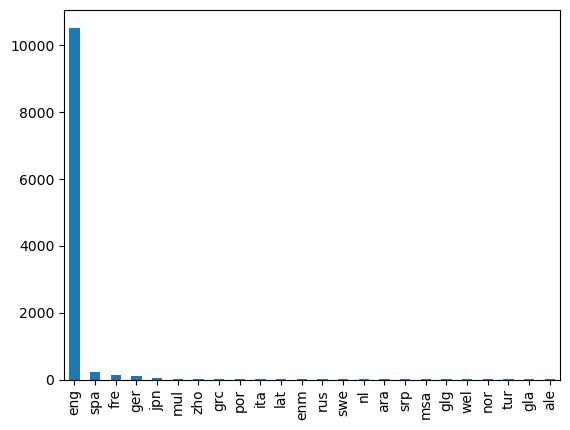

In [14]:
df["language_code"].value_counts().plot.bar()
plt.show()

### Working on the column "num_pages"

In [21]:
df["num_pages"].head(10)

0     652
1     870
2     352
3     435
4    2690
5     152
6    3342
7     815
8     815
9     215
Name: num_pages, dtype: int64

### Working on the "publication_date" column

In [29]:
df["publication_date"]

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11118    12/21/2004
11119     12/1/1988
11120      8/1/1993
11121     2/27/2007
11122     5/28/2006
Name: publication_date, Length: 11123, dtype: object

In [30]:
df["year"] = df["publication_date"].str.split("/")
df["year"] = df["year"].apply(lambda x: x[2])

In [31]:
df["year"]

0        2006
1        2004
2        2003
3        2004
4        2004
         ... 
11118    2004
11119    1988
11120    1993
11121    2007
11122    2006
Name: year, Length: 11123, dtype: object

In [32]:
df["year"] = df["year"].astype(int)

In [33]:
print("First year any boon was released: ", df["year"].min())
print("Last year any book was published: ", df["year"].max())

First year any boon was released:  1900
Last year any book was published:  2020


In [44]:
df[df["year"]==2020][['title', 'authors', 'average_rating', 'language_code', 'num_pages', 'publisher']].shape[0]

1

In [52]:
## Top 20 years with most publishing
df.groupby("year").agg("count").sort_values(by="title", ascending=False).head(20)["title"]

year
2006    1700
2005    1260
2004    1069
2003     931
2002     798
2001     656
2000     534
2007     518
1999     450
1998     396
1997     290
1996     250
1995     249
1994     220
1992     183
1993     165
1991     151
1989     118
1990     117
1987      88
Name: title, dtype: int64

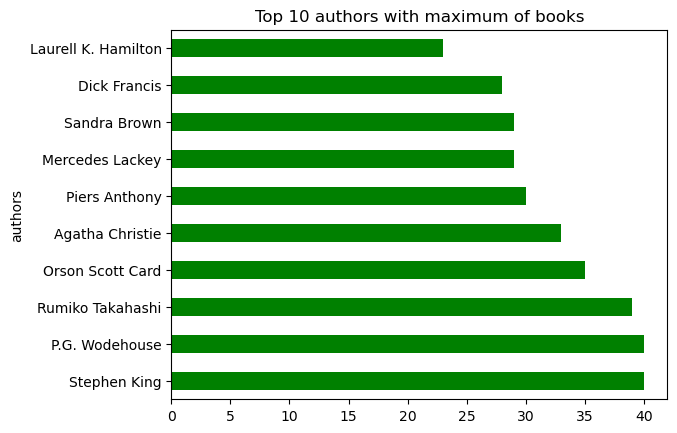

In [66]:
## Top 10 authors with maximum of books
df.groupby(["authors"]).agg("count").sort_values(by="title", ascending=False).head(10)["title"].plot.barh(color="green")
plt.title("Top 10 authors with maximum of books")
plt.show()

In [67]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [75]:
df.groupby(["language_code"])["average_rating", 'ratings_count', 'text_reviews_count'].agg("mean").sort_values(by="average_rating", ascending=False).style.background_gradient(cmap="Greens")

,average_rating,ratings_count,text_reviews_count
language_code,,,
wel,5.000000,1.000000,0.000000
gla,4.470000,11.000000,0.000000
zho,4.456429,20.428571,0.500000
tur,4.420000,1000.000000,41.000000
ale,4.360000,102.000000,16.000000
lat,4.353333,114.666667,12.333333
jpn,4.268696,68.304348,3.152174
rus,4.255000,4477.000000,98.500000
nl,4.180000,67.000000,9.000000


In [77]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [97]:
df["title"].value_counts().head(10)

The Iliad                     9
The Brothers Karamazov        9
The Odyssey                   8
Anna Karenina                 8
'Salem's Lot                  8
Gulliver's Travels            8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
The Histories                 6
Macbeth                       6
Name: title, dtype: int64

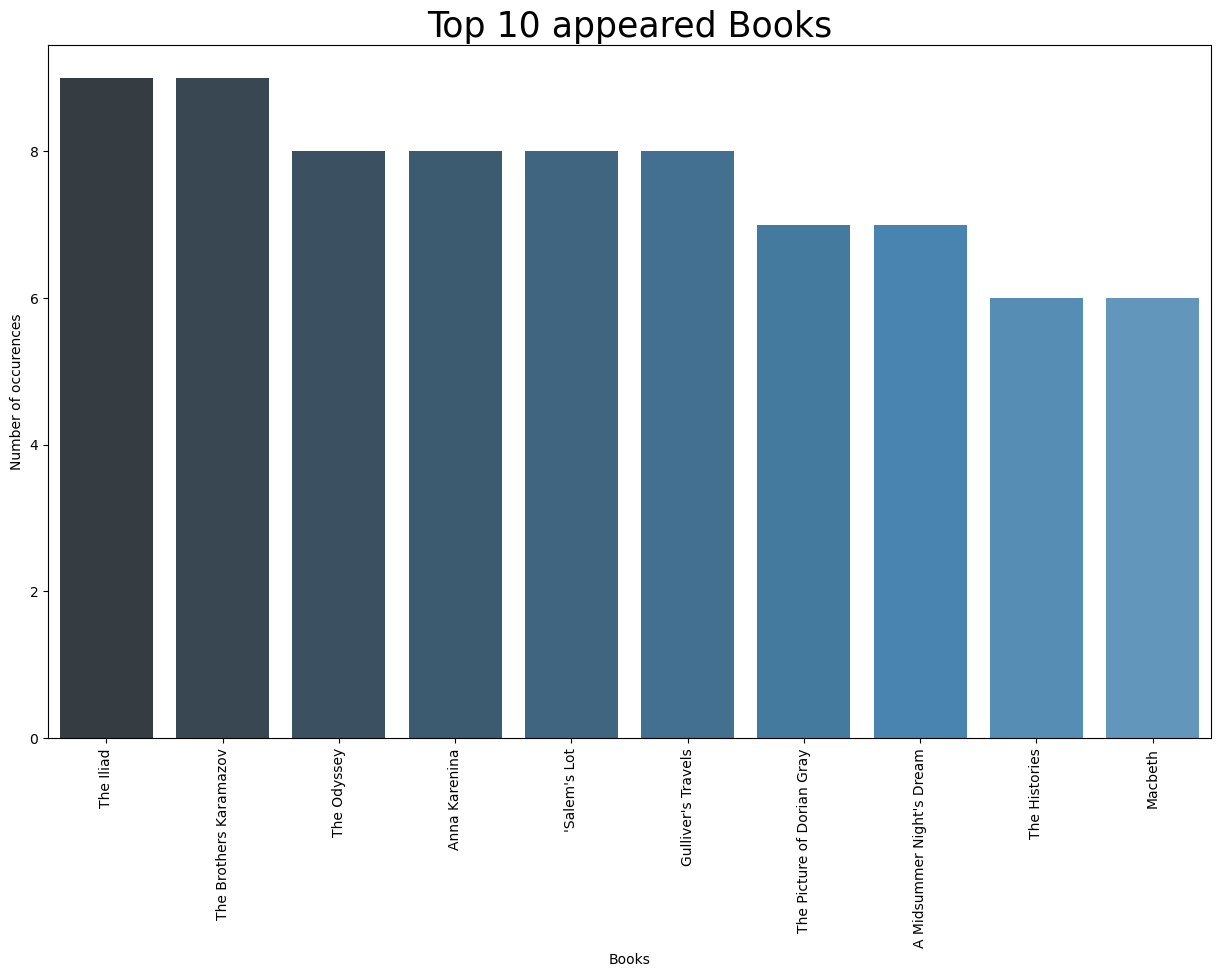

In [114]:
plt.figure(figsize=(15,9))
palette = sns.color_palette("Blues_d", n_colors=15)
palette.reverse()
sns.barplot(df["title"].value_counts().head(10).index, df["title"].value_counts().head(10).values, palette = palette)
plt.title("Top 10 appeared Books", fontsize=25)
plt.xticks(rotation=90)
plt.xlabel("Books")
plt.ylabel("Number of occurences")
plt.show()

In [81]:
df[df["title"] == "The Iliad"].sort_values(by="year", ascending=True)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
555,The Iliad,Homer/Robert Fitzgerald,3.86,eng,594,30,2,3/19/1992,Everyman,1992
403,The Iliad,Homer/Robert Fagles/Bernard Knox,3.86,eng,683,288792,3423,4/29/1999,Penguin Classics,1999
408,The Iliad,Homer/W.H.D. Rouse,3.86,eng,312,158,15,8/1/1999,Signet Classics,1999
5903,The Iliad,Homer,3.86,eng,150,3834,134,10/28/1999,John Wiley & Sons,1999
8536,The Iliad,Homer/Victor G. Ambrus/Nick McCarty,3.86,eng,95,8,3,9/15/2000,Kingfisher,2000
407,The Iliad,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.86,eng,462,1919,118,1/30/2003,Penguin Classics,2003
405,The Iliad,Homer/Robert Fitzgerald/Andrew Ford,3.86,eng,588,692,81,4/3/2004,Farrar Straus and Giroux,2004
3355,The Iliad,Homer/Robert Fagles/Derek Jacobi,3.86,eng,8,42,7,6/15/2006,Penguin-HighBridge,2006
8534,The Iliad,Homer/Andrew Lang,3.86,eng,542,64,8,9/1/2011,Collector's Library,2011


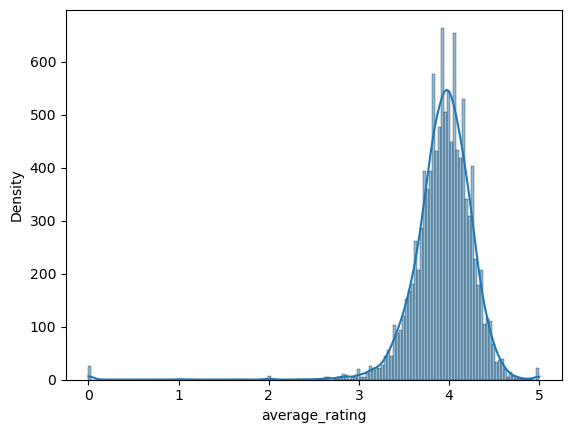

In [101]:
sns.histplot(df["average_rating"], kde=True)
plt.ylabel("Density")
plt.show()

In [104]:
## Books with the highest average rating
df[df["average_rating"] == df["average_rating"].max()][["title", "authors", "average_rating", "language_code"]]

,title,authors,average_rating,language_code
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.0,grc
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,5.0,eng
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,eng
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,eng
4125,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,eng
4788,The Diamond Color Meditation: Color Pathway to...,John Diamond,5.0,eng
4933,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,5.0,eng
5023,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,5.0,eng
5474,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,eng
5476,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,eng


In [105]:
## Books with the lowest average rating
df[df["average_rating"] == df["average_rating"].min()][["title", "authors", "average_rating", "language_code"]]

,title,authors,average_rating,language_code
265,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,eng
375,Juiced Official Strategy Guide,Doug Walsh,0.0,eng
987,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,eng
2532,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,eng
2533,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,eng
2758,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,srp
3492,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,eng
4241,American Film Guide,Frank N. Magill,0.0,eng
4677,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,eng
5323,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,eng


In [108]:
## Top publishers with maximum of books
df["publisher"].value_counts().head(20)

Vintage                         318
Penguin Books                   261
Penguin Classics                184
Mariner Books                   150
Ballantine Books                144
Harper Perennial                112
HarperCollins                   112
Pocket Books                    111
Bantam                          110
VIZ Media LLC                    88
Berkley                          86
Dover Publications               85
Modern Library                   82
Del Rey                          80
Tor Books                        76
Grand Central Publishing         76
Oxford University Press  USA     75
Oxford University Press          73
Scribner                         73
W. W. Norton  Company            68
Name: publisher, dtype: int64

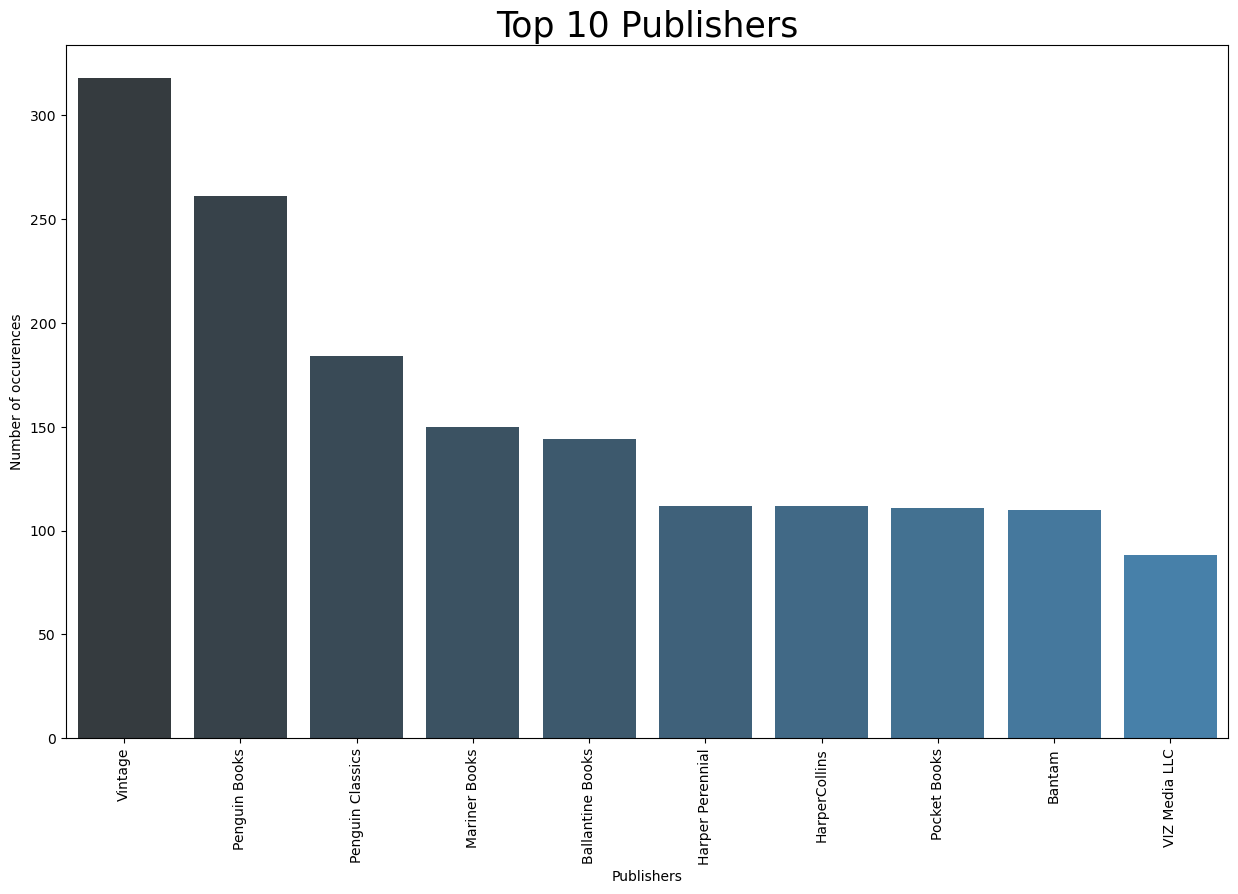

In [115]:
plt.figure(figsize=(15,9))
palette = sns.color_palette("Blues_d", n_colors=20)
palette.reverse()
sns.barplot(df["publisher"].value_counts().head(10).index, df["publisher"].value_counts().head(10).values, palette = palette)
plt.title("Top 10 Publishers", fontsize=25)
plt.xticks(rotation=90)
plt.xlabel("Publishers")
plt.ylabel("Number of occurences")
plt.show()

In [118]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [120]:
df[df["ratings_count"] == df["ratings_count"].max()][["title", "authors", "ratings_count"]]

,title,authors,ratings_count
10336,Twilight (Twilight #1),Stephenie Meyer,4597666


In [126]:
## Top 10 books with maximum ratings count
df.sort_values(by='ratings_count', ascending=False)[["title", "authors", "ratings_count"]].head(10).style.background_gradient(cmap="coolwarm")

,title,authors,ratings_count
10336,Twilight (Twilight #1),Stephenie Meyer,4597666
1697,The Hobbit or There and Back Again,J.R.R. Tolkien,2530894
1462,The Catcher in the Rye,J.D. Salinger,2457092
307,Angels & Demons (Robert Langdon #1),Dan Brown,2418736
3,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),J.K. Rowling/Mary GrandPré,2339585
4415,Harry Potter and the Chamber of Secrets (Harry Potter #2),J.K. Rowling/Mary GrandPré,2293963
1,Harry Potter and the Order of the Phoenix (Harry Potter #5),J.K. Rowling/Mary GrandPré,2153167
23,The Fellowship of the Ring (The Lord of the Rings #1),J.R.R. Tolkien,2128944
2114,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,2111750
0,Harry Potter and the Half-Blood Prince (Harry Potter #6),J.K. Rowling/Mary GrandPré,2095690


# Building Books Recommendation System

In [137]:
pd.set_option('max_columns', 2400)
sorted(df.publisher.unique())

['10/18',
 '1st Book Library',
 '1st World Library',
 'A & C Black (Childrens books)',
 'A Harvest Book/Harcourt  Inc.',
 'A K PETERS',
 'AA World Services',
 'ACE',
 'ADV Manga',
 'AHA! Process',
 'AIT Planet Lar',
 'AK Press',
 'AMR/Advanced Management Reports',
 'ASCD',
 'AVA Publishing',
 'Abacus',
 'Abacus Books',
 'Abacus Books (London)',
 'Abdo Publishing Company',
 'Abingdon Press',
 'Abradale Books/Harry N. Abrams',
 'Abraham Guillen Press',
 'Abrams',
 'Absolute Press',
 'Abstract Studio',
 'Academic Press',
 'Academica Press',
 'Academy Chicago Publishers',
 'Ace',
 'Ace Book',
 'Ace Books',
 'Ace Hardcover',
 'Ace Trade',
 'Ace/SFBC',
 'Acento Editorial',
 'Acropolis Books (NY)',
 'Actes Sud',
 'Adamant Media Corporation',
 'Adams Media',
 'Addison Wesley',
 'Addison Wesley Publishing Company',
 'Addison-Wesley Professional',
 'Advantage World Press',
 'Adventures Unlimited Press',
 'Aegypan',
 'Aerie',
 'Aivia Press',
 'Akashic Books/Punk Planet Books',
 'Aladdin',
 'Aladd

### Recommending books based on publishers

In [150]:
@interact
def recommend_books_on_publishers(publisher = list(df.publisher.value_counts().index)):
    books = df[df["publisher"] == publisher]
    books = books.sort_values(by="average_rating", ascending=False)[["title", "authors", "average_rating"]]
    return books.head(10)

interactive(children=(Dropdown(description='publisher', options=('Vintage', 'Penguin Books', 'Penguin Classics…

### Recommend books based on the authors

In [147]:
@interact
def recommend_books_on_autors(authors_name = list(df.authors.value_counts().index)):
    books = df[df["authors"] == authors_name]
    books = books.sort_values(by="average_rating", ascending=False)[["title", "authors", "average_rating"]]
    return books.head(10)

interactive(children=(Dropdown(description='authors_name', options=('Stephen King', 'P.G. Wodehouse', 'Rumiko …

### Recommend books based on titles

In [155]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', 'num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [154]:
@interact
def recommend_books_titles(titles = list(df.title.value_counts().index)):
    books = df[df["title"] == titles]
    books = books.sort_values(by="ratings_count", ascending=False)[["publisher", "ratings_count"]]
    return books.head(10).style.background_gradient(cmap = "magma")

interactive(children=(Dropdown(description='titles', options=('The Iliad', 'The Brothers Karamazov', 'The Odys…

### Recommend books based on languages

In [156]:
@interact
def recommend_books_on_languages(languages = list(df.language_code.value_counts().index)):
    books = df[df["language_code"] == languages]
    books = books.sort_values(by="average_rating", ascending=False)[["title", "authors", "average_rating"]]
    return books.head(10)

interactive(children=(Dropdown(description='languages', options=('eng', 'spa', 'fre', 'ger', 'jpn', 'mul', 'zh…

### Recommend books based on number of pages

In [157]:
def transform_num_pages_to_categories(x):
    if x <= 200:
        return "short"
    elif x > 200 and x<=400:
        return "medium"
    elif x > 400 and x <= 700:
        return "long"
    else:
        return "massive"

In [158]:
df["num_pages"]

0         652
1         870
2         352
3         435
4        2690
         ... 
11118     512
11119     635
11120     415
11121     434
11122     272
Name: num_pages, Length: 11123, dtype: int64

In [159]:
df["books_categories"] = df["num_pages"].apply(transform_num_pages_to_categories)

In [160]:
df["books_categories"]

0           long
1        massive
2         medium
3           long
4        massive
          ...   
11118       long
11119       long
11120       long
11121       long
11122     medium
Name: books_categories, Length: 11123, dtype: object

In [161]:
@interact
def recommend_books_on_categories(categories = list(df.books_categories.value_counts().index)):
    books = df[df["books_categories"] == categories]
    books = books.sort_values(by="average_rating", ascending=False)[["title", "authors", "average_rating"]]
    return books.head(10)

interactive(children=(Dropdown(description='categories', options=('medium', 'short', 'long', 'massive'), value…

## Preprocessing the data

In [162]:
## Converting numerical column into categorical column
def transform_num_to_category(x):
    if x <= 1:
        return "between 0 and 1"
    elif x > 1 and x <= 2:
        return "between 1 and 2"
    elif x > 2 and x <= 3:
        return "between 2 and 3"
    elif x > 3 and x <= 4:
        return "between 3 and 4"
    else:
        return "between 4 and 5"

In [163]:
df["rating_categories"] = df["average_rating"].apply(transform_num_to_category)

In [164]:
df["rating_categories"]

0        between 4 and 5
1        between 4 and 5
2        between 4 and 5
3        between 4 and 5
4        between 4 and 5
              ...       
11118    between 4 and 5
11119    between 4 and 5
11120    between 3 and 4
11121    between 3 and 4
11122    between 3 and 4
Name: rating_categories, Length: 11123, dtype: object

In [166]:
df["rating_categories"].value_counts()

between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 0 and 1      27
between 1 and 2       7
Name: rating_categories, dtype: int64

In [167]:
# let's encode the rating_categories column
rating_df = pd.get_dummies(df["rating_categories"])

In [169]:
rating_df.head(10)

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,1,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


In [170]:
# let's encode the language_code column
language_df = pd.get_dummies(df["language_code"])

In [171]:
language_df.head()

,ale,ara,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [173]:
# let's concatenate both the dataframes and set the title column as the index
features = pd.concat([rating_df, language_df, df["average_rating"], df["ratings_count"], df["title"]], axis = 1)
features.set_index("title", inplace = True)

In [174]:
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,eng,enm,fre,ger,gla,glg,grc,ita,jpn,lat,msa,mul,nl,nor,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.78,41428


In [175]:
features.shape

(11123, 31)

In [176]:
## We need now to scale the dataframe
from sklearn.preprocessing import MinMaxScaler

In [177]:
min_max_scaler = MinMaxScaler()

In [178]:
features_scaled = min_max_scaler.fit_transform(features)

In [180]:
features_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

# Recommending Books using K-Nearest Neighbor Algorithm

In [181]:
from sklearn import neighbors

In [182]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm="brute", metric="cosine")
model.fit(features_scaled)
dist, idlist = model.kneighbors(features_scaled)

In [184]:
@interact
def recommender(book_name = list(df.title.value_counts().index)):
    book_list_name = []
    books = df[df["title"] == book_name].index
    books = books[0]
    for newid in idlist[books]:
        book_list_name.append(df.loc[newid].title)
    
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…